<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week5/GRU_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRU Model dengan TensorFLow : ReviewTokoBaju.csv Dataset ✈**

GRU adalah pengembangan dari RNN yang dirancang untuk mengatasi masalah vanishing gradient. GRU menggunakan dua gerbang utama: gerbang pembaruan (update gate) dan gerbang reset (reset gate) untuk memutuskan informasi mana yang perlu disimpan dan mana yang harus dibuang. GRU lebih sederhana dibandingkan LSTM dan lebih efisien dalam beberapa kasus.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load dataset
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

## PreProcessing

In [3]:
# Pra-pemrosesan
data = data.dropna(subset=['Review Text', 'Recommended IND'])  # Menghapus baris dengan Review Text atau Recommended IND yang kosong
data['Review Text'] = data['Review Text'].apply(lambda x: x.lower())  # Mengubah teks menjadi lowercase


<ipython-input-3-45f67d9b05f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review Text'] = data['Review Text'].apply(lambda x: x.lower())  # Mengubah teks menjadi lowercase


In [4]:
# Menyiapkan fitur (X) dan target (y)
X = data['Review Text']
y = data['Recommended IND']


In [5]:
# Tokenisasi menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi hanya 5000 fitur teratas
X_tfidf = vectorizer.fit_transform(X).toarray()


In [6]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# TensorFlow tidak memerlukan tensor PyTorch, cukup gunakan array NumPy

## Build Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [8]:
# Membuat model GRU
model = Sequential()

In [9]:
# Menambahkan layer GRU
model.add(GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=False))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Menambahkan Dropout untuk menghindari overfitting
model.add(Dropout(0.2))


In [11]:
# Output layer (2 kelas: 0 untuk tidak direkomendasikan, 1 untuk direkomendasikan)
model.add(Dense(2, activation='softmax'))


In [12]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,994 (50.76 KB)

 Trainable params: 12,994 (50.76 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [14]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 80s 134ms/step - accuracy: 0.8142 - loss: 0.4949 - val_accuracy: 0.8207 - val_loss: 0.4708
Epoch 2/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 79s 134ms/step - accuracy: 0.8178 - loss: 0.4767 - val_accuracy: 0.8207 - val_loss: 0.4703
Epoch 3/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 81s 133ms/step - accuracy: 0.8198 - loss: 0.4735 - val_accuracy: 0.8207 - val_loss: 0.4713
Epoch 4/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 79s 128ms/step - accuracy: 0.8132 - loss: 0.4826 - val_accuracy: 0.8207 - val_loss: 0.4706
Epoch 5/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 85s 134ms/step - accuracy: 0.8215 - loss: 0.4708 - val_accuracy: 0.8207 - val_loss: 0.4703
Epoch 6/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 73s 128ms/step - accuracy: 0.8196 - loss: 0.4734 - val_accuracy: 0.8207 - val_loss: 0.4713
Epoch 7/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 84s 133ms/step - accuracy: 0.8223 - loss: 0.4691 - val_accuracy: 0.8207 - val_loss: 0.4703
Epoch 8/10
566/566 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - accuracy: 0.8163 - loss: 0

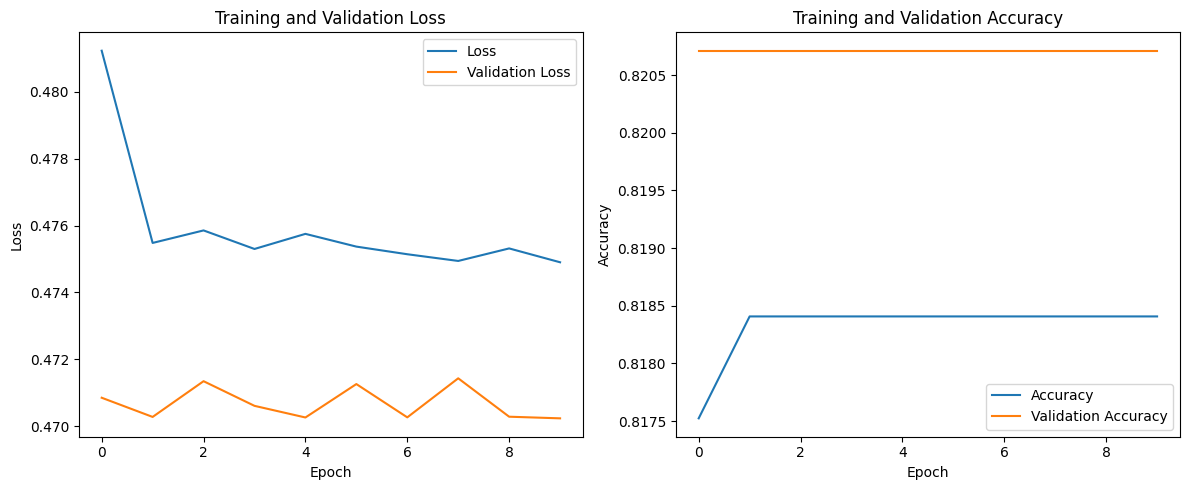

In [17]:
# Visualisasi Loss dan Accuracy
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluasi Model

In [18]:
# Evaluasi model pada data test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step


In [19]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred_classes)
fpr, tpr, _ = roc_curve(y_test, y_pred_classes)

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

In [21]:
# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8207
Precision: 0.8207
Recall: 1.0000
F1 Score: 0.9015
AUC: 0.5000


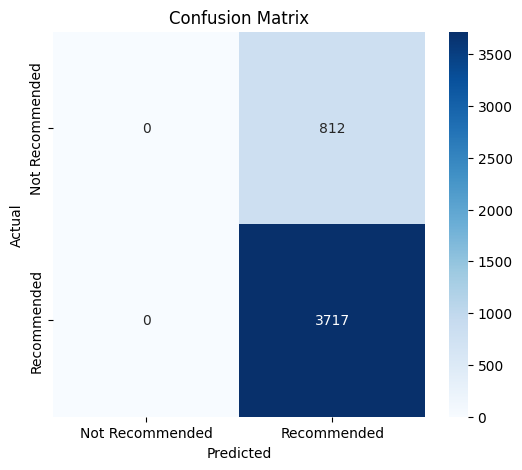

In [22]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


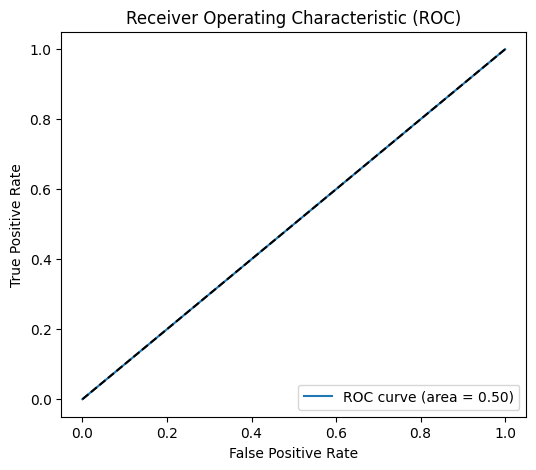

In [23]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#**Penjelasan Singkat**

1️⃣ Akurasi (Accuracy)

Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi.


Akurasi=

*TP+TN/
TP+TN+FP+FN*
​

📌 Keterangan:

TP (True Positive) → Prediksi benar sebagai positif.

TN (True Negative) → Prediksi benar sebagai negatif.

FP (False Positive) → Prediksi salah sebagai positif.

FN (False Negative) → Prediksi salah sebagai negatif.


2️⃣ Presisi (Precision)

Presisi mengukur seberapa akurat model dalam memprediksi kelas positif.

Presisi=
*TP/
TP+FP*



📌 Keterangan:

Jika model memiliki presisi tinggi, berarti model jarang salah dalam memprediksi kelas positif.

Jika presisi rendah, model sering salah memprediksi negatif sebagai positif (False Positive tinggi).

3️⃣ Recall (Sensitivitas)

Recall mengukur seberapa baik model dalam menangkap semua kasus positif.

Recall=
*TP/
TP+FN*


📌 Keterangan:

Jika recall tinggi, berarti model berhasil menangkap hampir semua data positif.
Jika recall rendah, model sering gagal mengenali positif sebagai negatif (False Negative tinggi).

4️⃣ F1-Score (Harmonic Mean)
F1-score menggabungkan presisi dan recall dalam satu metrik menggunakan rata-rata harmonik.

𝐹
1
=
2
×
Presisi
×
Recall/
Presisi
+
Recall

📌 Keterangan:

F1-score tinggi berarti model seimbang dalam presisi dan recall.

Bagus untuk dataset tidak seimbang, karena mempertimbangkan False Positive dan False Negative secara bersamaan.

5️⃣ Area Under Curve (AUC - ROC)
AUC (Area Under Curve) mengukur seberapa baik model membedakan antara kelas positif dan negatif.

AUC berasal dari ROC Curve, yang membandingkan True Positive Rate (TPR) vs False Positive Rate (FPR).

TPR
=
𝑇
𝑃/
𝑇
𝑃
+
𝐹
𝑁

(Sama dengan Recall)

*FPR=
FP/
FP+TN*

📌 Keterangan:

AUC = 1.0 → Model sempurna (memisahkan kelas dengan sempurna).
AUC = 0.5 → Model acak (tidak lebih baik dari tebak-tebakan).
AUC < 0.5 → Model lebih buruk dari acak (terbalik).

6️⃣ Receiver Operating Characteristic (ROC) Curve

ROC Curve adalah grafik yang membandingkan TPR vs FPR pada berbagai threshold.


Sumbu X → FPR (False Positive Rate)

Sumbu Y → TPR (True Positive Rate / Recall)

📌 Bagaimana membacanya?


Semakin tinggi kurva, semakin baik model.

ROC yang mendekati diagonal (AUC ≈ 0.5) berarti model tidak berguna.